# Assignment 3(Part2)
Mount the Google Drive


In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Import Libraries
First we have to install and import OpenCV.

Import imutils and argparse packages as well.

In [ ]:
# import the necessary packages
!pip install opencv-python
# !pip install --upgrade imutils
!pip3 install imutils

In [ ]:
import cv2

from matplotlib import pyplot as plt

While installing OpenCV you will get an error. You have to debug it and then move forward. 

### Defining our shape detector
In this section we will define our shape detector as follow:



1.   Initialize the shape name and approximate the contour of the shape.
2.   If the shape is a triangle, it will have 3 vertices
3.   If the shape has 4 vertices, it is either a square or a rectangle, 
      compute the bounding box of the contour and use the bounding box to       compute the aspect ratio. a square will have an aspect ratio that is approximately equal to one, otherwise, the shape is a rectangle.
4.   If the shape is a pentagon, it will have 5 vertices
5.   Otherwise, we assume the shape is a circle

Just run this block, you don't have to write and understand anything 

In [ ]:
class ShapeDetector:
	def __init__(self):
		pass

	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"

		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)

			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"

		# return the name of the shape
		return shape

### Shape detection with OpenCV
Upload your test image provided with assignment to your google drive

In [ ]:
# construct the argument parser and parse the arguments
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

#Add path to the test image
path="/content/drive/MyDrive/ANN assignment/Assignment 1/Assignment (Part2)/test_image.png"
args = {
	"image":path
}

#Image Pre-Processing
•	After that we will use OpenCV to do some preprocessing on test image.
•	Load the image and resize it to a smaller factor so that the shapes can be approximated better. (You might get an error while reading the image and doing image processing. To resolve the error, head back to the block where you imported the libraries to debug.

•	Write a code to Convert the resized image to grayscale, blur it slightly by using Gaussian filter of Kernel 5x5

•	Threshold the blurred image between 60 and 255. Find contours in the thresholded image that how many shapes are there in the image and initialize the shape detector with an object of ShapeDetector Class.


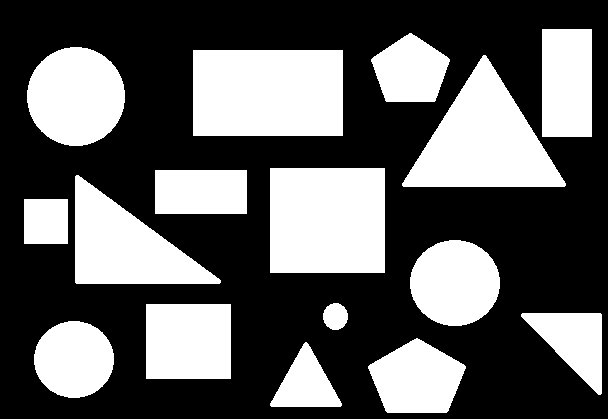

In [ ]:
# read the image 
### Write Code here####
from google.colab.patches import cv2_imshow
import imutils
image =  cv2.imread('/content/drive/MyDrive/ANN assignment/Assignment 1/Assignment (Part2)/test_image.png')
####################

# convert the image to grayscale
### Write Code here####
grayscale=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
########################

#threshold it
thresh = cv2.threshold(grayscale, 60, 255, cv2.THRESH_BINARY)

######Display the final processed image######

cv2_imshow(thresh)
#############################################

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

While running the above block if you get the error as shown above, check the block where the libraries have been imported.

After resolving error, the block will run smoothly and the output is shown below

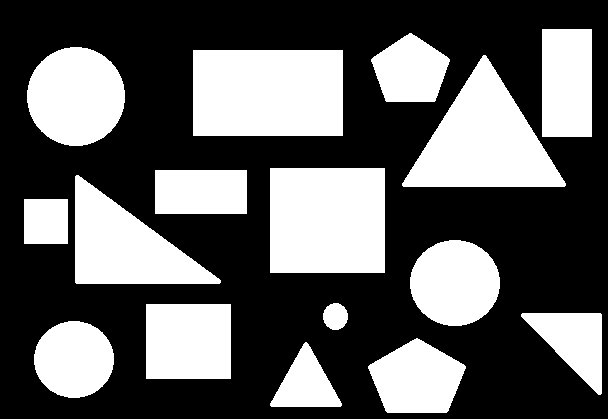

In [ ]:
# load the image 
image = cv2.imread(args["image"])

# convert the image to grayscale
### Write Code here####
grayscale=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
########################

#threshold it
thresh = cv2.threshold(grayscale, 60, 255, cv2.THRESH_BINARY)[1]
######Display the final processed image######
cv2_imshow(thresh)

#############################################

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

# Function to display images
Write a function to convert the input image frame BGR to RGB color space and display it. You will use this function in next block to print the output image.

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
#########Write your Code here##########
	im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	
######################################
	# plt.title(title)
	# plt.grid(False)
	# plt.show()

# Detect the Shapes and Label them
We will loop through the number of contours found in step 4 while defining the shapes.
* 	First compute the center of the contour, then detect the name of the shape 
using only the contour. Use moment function for that.

Image Moment is a particular weighted average of image pixel intensities, with the help of which we can find some specific properties of an image, like radius, area, centroid etc. To find the centroid of the image, we generally convert it to binary format and then find its center.

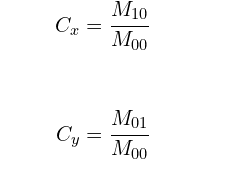

C_x is the x coordinate and C_y is the y coordinate of the centroid and M denotes the Moment.

To find the center of the blob, we will perform the following steps:-

1. Convert the Image to grayscale.

2. Perform Binarization on the Image.

3. Find the center of the image after calculating the moments.

That is why we have converted the image to grayscale and then threshold was applied for binarization in pre-processing.
* Then draw the contours using drawContour function:

**Syntax: DrawContours(img, contour, external_color, hole_color, max_level, thickness=1, lineType=8, offset=(0, 0))**

You will notice that the function accepts 8 arguments:

**5 needed** (img, contour, external_color, hole_color, max_level)

**3 optional** (thickness, lineType, offset)

* Write the name of the shape on the image using putText  method that is used to draw a text string on any image:

**Syntax:  cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])**

Parameters:

**image:** It is the image on which text is to be drawn.

**text:** Text string to be drawn.

**org:** It is the coordinates of the bottom-left corner of the text string in the image. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).

**font:** It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.

**fontScale:** Font scale factor that is multiplied by the font-specific base size.

**color:** It is the color of text string to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.


**thickness:** It is the thickness of the line in px.

**lineType:** This is an optional parameter.It gives the type of the line to be used.

**bottomLeftOrigin:** This is an optional parameter. When it is true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

* Plot the output image by using the function defined in previous step.

In this block you might get and error because of naming convention of the imported libraries. If you get the error check the block where the libraries have been imported.

[[[305 342]]

 [[303 344]]

 [[303 345]]

 [[302 346]]

 [[302 347]]

 [[300 349]]

 [[300 350]]

 [[299 351]]

 [[299 352]]

 [[298 353]]

 [[298 354]]

 [[297 355]]

 [[297 356]]

 [[295 358]]

 [[295 359]]

 [[294 360]]

 [[294 361]]

 [[293 362]]

 [[293 363]]

 [[291 365]]

 [[291 366]]

 [[290 367]]

 [[290 368]]

 [[289 369]]

 [[289 370]]

 [[288 371]]

 [[288 372]]

 [[286 374]]

 [[286 375]]

 [[285 376]]

 [[285 377]]

 [[284 378]]

 [[284 379]]

 [[283 380]]

 [[283 381]]

 [[281 383]]

 [[281 384]]

 [[280 385]]

 [[280 386]]

 [[279 387]]

 [[279 388]]

 [[278 389]]

 [[278 390]]

 [[276 392]]

 [[276 393]]

 [[275 394]]

 [[275 395]]

 [[274 396]]

 [[274 397]]

 [[273 398]]

 [[273 399]]

 [[271 401]]

 [[271 402]]

 [[270 403]]

 [[270 405]]

 [[271 406]]

 [[340 406]]

 [[341 405]]

 [[341 403]]

 [[340 402]]

 [[340 401]]

 [[339 400]]

 [[339 399]]

 [[337 397]]

 [[337 396]]

 [[336 395]]

 [[336 394]]

 [[335 393]]

 [[335 392]]

 [[334 391]]

 [[334 390]]

 [[332

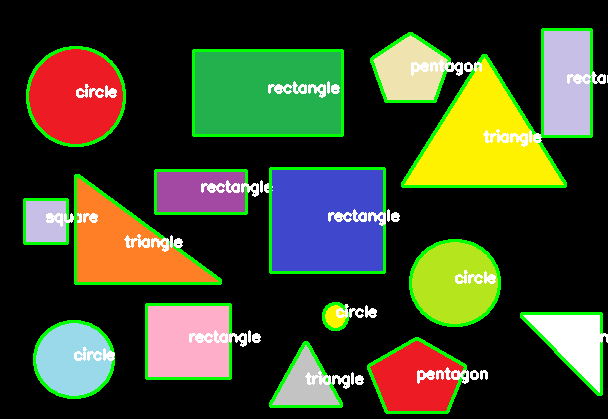

In [ ]:

# loop over the contours
for c in cnts:  # c is the ‘contours‘ a Python list of all the contours in the image
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	print(c)
	M = cv2.moments(c)  
	cX = int(M["m10"] / M["m00"])  # X coordinate of the centroid 
	cY = int(M["m01"] / M["m00"])  # Y coordinate of the centroid 
	shape = sd.detect(c)


	# then draw the contours and the name of the shape on the image

	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)

	# show the output image
cv2_imshow(image)